# Problem Statement

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase- 

# Data Collection Phase 

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model 
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. 
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.

# Model Building Phase 

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. 
Follow the complete life cycle of data science. Include all the steps like. 
1.	Data Cleaning 
2.	Exploratory Data Analysis 
3.	Data Pre-processing 
4.	Model Building 
5.	Model Evaluation 
6.	Selecting the best model 
 

# Data Collection

# Importing necessary libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Website

In [2]:
website = 'https://www.cars.com/shopping/results/?dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=&maximum_distance=30&mileage_max=&page_size=20&sort=best_match_desc&stock_type=used&year_max=2022&year_min=2018&zip='

In [3]:
response = requests.get(website)

In [4]:
response.status_code

200

In [5]:
soup = BeautifulSoup(response.content,'html.parser')

In [6]:
soup

<!DOCTYPE html>

<html class="ep-theme-cars" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title data-suffix=" | Cars.com">Used Vehicles for Sale | Cars.com</title>
<meta content="Shop used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." name="description"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="Cars.com" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="Used Vehicles for Sale | Cars.com" property="og:title"/>
<meta content="https://www.cars.com/shopping/results" property="og:url"/>
<meta content="Shop used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." property="og:description"/>
<meta content="https://graphics.cars.com/images/core/log

In [7]:
results = soup.find_all('div',{'class':'vehicle-card'})

In [8]:
len(results)

20

In [9]:
results[0].find('h2').get_text()

'2018 Jeep Wrangler Unlimited Rubicon'

In [10]:
results[0].find('div',{'class':'mileage'}).get_text()

'54,107 mi.'

In [11]:
results[0].find('span',{'class':'sds-rating__count'}).get_text()

'2.4'

In [12]:
results[0].find('span',{'class':'sds-rating__link sds-button-link'}).get_text()

'(53 reviews)'

In [13]:
results[0].find('span',{'class':'primary-price'}).get_text()

'$42,995'

In [14]:
results[0].find('div',{'class':'dealer-name'}).get_text().strip()

'Superior Dodge Chrysler Jeep Ram Of Siloam Springs'

In [15]:
results[0].find('p',{'class':'stock-type'}).get_text()

'Used'

In [16]:
Condition =[]
Model = []
Dealer_name = []
Mileage = []
Ratings = []
Reviews = []
Price = []

In [17]:
for i in range(1,301):
    for result in results:
        # Condition
        try:
            Condition.append(result.find('p',{'class':'stock-type'}).get_text())
        except :
            Condition.append('N/A')
    
        # Model
        try :
            Model.append(result.find('h2').get_text())
        except :
            Model.append('N/A')
        
        # Dealer_name
        try:
            Dealer_name.append(result.find('div',{'class':'dealer-name'}).get_text().strip())
        except :
            Dealer_name.append('N/A')
        
        # Mileage 
        try:
            Mileage.append(result.find('div',{'class':'mileage'}).get_text())
        except :
            Mileage.append('N/A')
        
        # Ratings
        try :
            Ratings.append(result.find('span',{'class':'sds-rating__count'}).get_text())
        except:
            Ratings.append('N/A')
        
        # Rating_counts
        try:
            Reviews.append(result.find('span',{'class':'sds-rating__link sds-button-link'}).get_text())
        except:
            Reviews.append('N/A')
        
        # Price
        try:
            Price.append(result.find('span',{'class':'primary-price'}).get_text())
        except:
            Price.append('N/A')
                 

In [18]:
Condition

['Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswage

In [19]:
len(Condition)

6000

In [20]:
Model

['2018 Jeep Wrangler Unlimited Rubicon',
 '2022 Volkswagen Atlas 3.6L SE w/Technology',
 '2022 Buick Encore Preferred',
 '2022 Volvo XC90 T6 Inscription 6 Passenger',
 '2020 Chevrolet Bolt EV Premier',
 '2021 BMW 430 i',
 '2021 Porsche 718 Cayman GT4',
 '2022 Toyota Camry Hybrid LE',
 '2021 Audi Q5 45 Premium',
 '2022 Honda Ridgeline RTL',
 '2018 INFINITI Q60 3.0t LUXE',
 '2018 Ford Expedition Max XLT',
 '2021 Hyundai Palisade SEL',
 '2021 GMC Yukon Denali',
 '2019 GMC Yukon XL SLT',
 '2018 Dodge Charger R/T',
 '2020 INFINITI QX60 Pure',
 '2018 Chevrolet Traverse LS',
 '2021 GMC Yukon Denali',
 '2022 Kia Carnival SX',
 '2018 Jeep Wrangler Unlimited Rubicon',
 '2022 Volkswagen Atlas 3.6L SE w/Technology',
 '2022 Buick Encore Preferred',
 '2022 Volvo XC90 T6 Inscription 6 Passenger',
 '2020 Chevrolet Bolt EV Premier',
 '2021 BMW 430 i',
 '2021 Porsche 718 Cayman GT4',
 '2022 Toyota Camry Hybrid LE',
 '2021 Audi Q5 45 Premium',
 '2022 Honda Ridgeline RTL',
 '2018 INFINITI Q60 3.0t LUXE',


In [21]:
len(Model)

6000

In [22]:
Dealer_name

['Superior Dodge Chrysler Jeep Ram Of Siloam Springs',
 'Don Thornton Volkswagen of Tulsa',
 'Impex Chevrolet GMC Buick',
 'Volvo Cars Mall of Georgia',
 'RideShift - Richmond',
 'Jaguar Land Rover Bluff City',
 'R3 Motorcars LLC',
 'Briggs Fort Scott',
 'Toyota of Smithfield',
 'Victory Honda of Austinburg',
 'Team Chevrolet',
 'Stuckey Ford',
 'Ron Anderson Chevrolet Buick GMC',
 'Tadd Jenkins Ford',
 'Les Mack',
 'Golden Motors',
 'Pischke Motors of La Crosse',
 'Modern Classic Motors',
 'Tadd Jenkins Ford',
 'Magic City Ford Roanoke',
 'Superior Dodge Chrysler Jeep Ram Of Siloam Springs',
 'Don Thornton Volkswagen of Tulsa',
 'Impex Chevrolet GMC Buick',
 'Volvo Cars Mall of Georgia',
 'RideShift - Richmond',
 'Jaguar Land Rover Bluff City',
 'R3 Motorcars LLC',
 'Briggs Fort Scott',
 'Toyota of Smithfield',
 'Victory Honda of Austinburg',
 'Team Chevrolet',
 'Stuckey Ford',
 'Ron Anderson Chevrolet Buick GMC',
 'Tadd Jenkins Ford',
 'Les Mack',
 'Golden Motors',
 'Pischke Motors o

In [23]:
len(Dealer_name)

6000

In [24]:
Mileage

['54,107 mi.',
 '10,301 mi.',
 '3 mi.',
 '9,109 mi.',
 '15,642 mi.',
 '19,020 mi.',
 '1,622 mi.',
 '14,002 mi.',
 '7,345 mi.',
 '2,965 mi.',
 '40,262 mi.',
 '90,922 mi.',
 '30,358 mi.',
 '25,010 mi.',
 '25,600 mi.',
 '81,886 mi.',
 '27,804 mi.',
 '67,277 mi.',
 '19,080 mi.',
 '23,381 mi.',
 '54,107 mi.',
 '10,301 mi.',
 '3 mi.',
 '9,109 mi.',
 '15,642 mi.',
 '19,020 mi.',
 '1,622 mi.',
 '14,002 mi.',
 '7,345 mi.',
 '2,965 mi.',
 '40,262 mi.',
 '90,922 mi.',
 '30,358 mi.',
 '25,010 mi.',
 '25,600 mi.',
 '81,886 mi.',
 '27,804 mi.',
 '67,277 mi.',
 '19,080 mi.',
 '23,381 mi.',
 '54,107 mi.',
 '10,301 mi.',
 '3 mi.',
 '9,109 mi.',
 '15,642 mi.',
 '19,020 mi.',
 '1,622 mi.',
 '14,002 mi.',
 '7,345 mi.',
 '2,965 mi.',
 '40,262 mi.',
 '90,922 mi.',
 '30,358 mi.',
 '25,010 mi.',
 '25,600 mi.',
 '81,886 mi.',
 '27,804 mi.',
 '67,277 mi.',
 '19,080 mi.',
 '23,381 mi.',
 '54,107 mi.',
 '10,301 mi.',
 '3 mi.',
 '9,109 mi.',
 '15,642 mi.',
 '19,020 mi.',
 '1,622 mi.',
 '14,002 mi.',
 '7,345 mi.',


In [25]:
len(Mileage)

6000

In [26]:
Ratings

['2.4',
 '3.8',
 'N/A',
 '4.9',
 'N/A',
 '4.8',
 '5.0',
 '3.6',
 '3.4',
 'N/A',
 '4.5',
 'N/A',
 '2.9',
 'N/A',
 '4.9',
 'N/A',
 '3.4',
 '4.0',
 'N/A',
 '2.5',
 '2.4',
 '3.8',
 'N/A',
 '4.9',
 'N/A',
 '4.8',
 '5.0',
 '3.6',
 '3.4',
 'N/A',
 '4.5',
 'N/A',
 '2.9',
 'N/A',
 '4.9',
 'N/A',
 '3.4',
 '4.0',
 'N/A',
 '2.5',
 '2.4',
 '3.8',
 'N/A',
 '4.9',
 'N/A',
 '4.8',
 '5.0',
 '3.6',
 '3.4',
 'N/A',
 '4.5',
 'N/A',
 '2.9',
 'N/A',
 '4.9',
 'N/A',
 '3.4',
 '4.0',
 'N/A',
 '2.5',
 '2.4',
 '3.8',
 'N/A',
 '4.9',
 'N/A',
 '4.8',
 '5.0',
 '3.6',
 '3.4',
 'N/A',
 '4.5',
 'N/A',
 '2.9',
 'N/A',
 '4.9',
 'N/A',
 '3.4',
 '4.0',
 'N/A',
 '2.5',
 '2.4',
 '3.8',
 'N/A',
 '4.9',
 'N/A',
 '4.8',
 '5.0',
 '3.6',
 '3.4',
 'N/A',
 '4.5',
 'N/A',
 '2.9',
 'N/A',
 '4.9',
 'N/A',
 '3.4',
 '4.0',
 'N/A',
 '2.5',
 '2.4',
 '3.8',
 'N/A',
 '4.9',
 'N/A',
 '4.8',
 '5.0',
 '3.6',
 '3.4',
 'N/A',
 '4.5',
 'N/A',
 '2.9',
 'N/A',
 '4.9',
 'N/A',
 '3.4',
 '4.0',
 'N/A',
 '2.5',
 '2.4',
 '3.8',
 'N/A',
 '4.9',
 'N/A',


In [27]:
len(Ratings)

6000

In [28]:
Reviews

['(53 reviews)',
 '(281 reviews)',
 '(6 reviews)',
 '(2,209 reviews)',
 'N/A',
 '(550 reviews)',
 '(223 reviews)',
 '(109 reviews)',
 '(291 reviews)',
 '(0 reviews)',
 '(50 reviews)',
 '(0 reviews)',
 '(208 reviews)',
 '(0 reviews)',
 '(76 reviews)',
 '(4 reviews)',
 '(60 reviews)',
 '(351 reviews)',
 '(0 reviews)',
 '(90 reviews)',
 '(53 reviews)',
 '(281 reviews)',
 '(6 reviews)',
 '(2,209 reviews)',
 'N/A',
 '(550 reviews)',
 '(223 reviews)',
 '(109 reviews)',
 '(291 reviews)',
 '(0 reviews)',
 '(50 reviews)',
 '(0 reviews)',
 '(208 reviews)',
 '(0 reviews)',
 '(76 reviews)',
 '(4 reviews)',
 '(60 reviews)',
 '(351 reviews)',
 '(0 reviews)',
 '(90 reviews)',
 '(53 reviews)',
 '(281 reviews)',
 '(6 reviews)',
 '(2,209 reviews)',
 'N/A',
 '(550 reviews)',
 '(223 reviews)',
 '(109 reviews)',
 '(291 reviews)',
 '(0 reviews)',
 '(50 reviews)',
 '(0 reviews)',
 '(208 reviews)',
 '(0 reviews)',
 '(76 reviews)',
 '(4 reviews)',
 '(60 reviews)',
 '(351 reviews)',
 '(0 reviews)',
 '(90 review

In [29]:
len(Reviews)

6000

In [30]:
Price

['$42,995',
 '$46,355',
 '$23,950',
 '$71,482',
 '$32,699',
 '$45,988',
 '$129,989',
 '$29,995',
 '$41,696',
 '$39,857',
 '$34,160',
 '$32,497',
 '$40,500',
 '$79,995',
 '$52,973',
 '$25,950',
 '$32,499',
 '$23,373',
 '$79,995',
 '$49,600',
 '$42,995',
 '$46,355',
 '$23,950',
 '$71,482',
 '$32,699',
 '$45,988',
 '$129,989',
 '$29,995',
 '$41,696',
 '$39,857',
 '$34,160',
 '$32,497',
 '$40,500',
 '$79,995',
 '$52,973',
 '$25,950',
 '$32,499',
 '$23,373',
 '$79,995',
 '$49,600',
 '$42,995',
 '$46,355',
 '$23,950',
 '$71,482',
 '$32,699',
 '$45,988',
 '$129,989',
 '$29,995',
 '$41,696',
 '$39,857',
 '$34,160',
 '$32,497',
 '$40,500',
 '$79,995',
 '$52,973',
 '$25,950',
 '$32,499',
 '$23,373',
 '$79,995',
 '$49,600',
 '$42,995',
 '$46,355',
 '$23,950',
 '$71,482',
 '$32,699',
 '$45,988',
 '$129,989',
 '$29,995',
 '$41,696',
 '$39,857',
 '$34,160',
 '$32,497',
 '$40,500',
 '$79,995',
 '$52,973',
 '$25,950',
 '$32,499',
 '$23,373',
 '$79,995',
 '$49,600',
 '$42,995',
 '$46,355',
 '$23,950',


In [31]:
len(Price)

6000

In [32]:
cars_data = pd.DataFrame({'Condition':Condition,'Model Name':Model,'Dealer':Dealer_name,'Mileage':Mileage,'Ratings':Ratings,'Reviews':Reviews,'Price':Price})

In [33]:
cars_data

,Condition,Model Name,Dealer,Mileage,Ratings,Reviews,Price
0,Used,2018 Jeep Wrangler Unlimited Rubicon,Superior Dodge Chrysler Jeep Ram Of Siloam Spr...,"54,107 mi.",2.4,(53 reviews),"$42,995"
1,Volkswagen Certified,2022 Volkswagen Atlas 3.6L SE w/Technology,Don Thornton Volkswagen of Tulsa,"10,301 mi.",3.8,(281 reviews),"$46,355"
2,Used,2022 Buick Encore Preferred,Impex Chevrolet GMC Buick,3 mi.,N/A,(6 reviews),"$23,950"
3,Used,2022 Volvo XC90 T6 Inscription 6 Passenger,Volvo Cars Mall of Georgia,"9,109 mi.",4.9,"(2,209 reviews)","$71,482"
4,Used,2020 Chevrolet Bolt EV Premier,RideShift - Richmond,"15,642 mi.",N/A,N/A,"$32,699"
...,...,...,...,...,...,...,...
5995,Used,2018 Dodge Charger R/T,Golden Motors,"81,886 mi.",N/A,(4 reviews),"$25,950"
5996,Used,2020 INFINITI QX60 Pure,Pischke Motors of La Crosse,"27,804 mi.",3.4,(60 reviews),"$32,499"
5997,Used,2018 Chevrolet Traverse LS,Modern Classic Motors,"67,277 mi.",4.0,(351 reviews),"$23,373"
5998,Used,2021 GMC Yukon Denali,Tadd Jenkins Ford,"19,080 mi.",N/A,(0 reviews),"$79,995"


# Data Cleaning

In [34]:
cars_data['Mileage']=cars_data['Mileage'].apply(lambda x:x.strip(' mi.')) 
cars_data['Reviews'] = cars_data['Reviews'].apply(lambda x:x.strip('reviews)').strip('('))
cars_data['Price']=cars_data['Price'].apply(lambda x:x.strip('$'))

In [35]:
cars_data

,Condition,Model Name,Dealer,Mileage,Ratings,Reviews,Price
0,Used,2018 Jeep Wrangler Unlimited Rubicon,Superior Dodge Chrysler Jeep Ram Of Siloam Spr...,"54,107",2.4,53,"42,995"
1,Volkswagen Certified,2022 Volkswagen Atlas 3.6L SE w/Technology,Don Thornton Volkswagen of Tulsa,"10,301",3.8,281,"46,355"
2,Used,2022 Buick Encore Preferred,Impex Chevrolet GMC Buick,3,N/A,6,"23,950"
3,Used,2022 Volvo XC90 T6 Inscription 6 Passenger,Volvo Cars Mall of Georgia,"9,109",4.9,"2,209","71,482"
4,Used,2020 Chevrolet Bolt EV Premier,RideShift - Richmond,"15,642",N/A,N/A,"32,699"
...,...,...,...,...,...,...,...
5995,Used,2018 Dodge Charger R/T,Golden Motors,"81,886",N/A,4,"25,950"
5996,Used,2020 INFINITI QX60 Pure,Pischke Motors of La Crosse,"27,804",3.4,60,"32,499"
5997,Used,2018 Chevrolet Traverse LS,Modern Classic Motors,"67,277",4.0,351,"23,373"
5998,Used,2021 GMC Yukon Denali,Tadd Jenkins Ford,"19,080",N/A,0,"79,995"


In [36]:
cars_data['make_year'] = [x[:4] for x in cars_data['Model Name']]
cars_data['car_model'] = [x[4:] for x in cars_data['Model Name']]

In [37]:
cars_data

,Condition,Model Name,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,Used,2018 Jeep Wrangler Unlimited Rubicon,Superior Dodge Chrysler Jeep Ram Of Siloam Spr...,"54,107",2.4,53,"42,995",2018,Jeep Wrangler Unlimited Rubicon
1,Volkswagen Certified,2022 Volkswagen Atlas 3.6L SE w/Technology,Don Thornton Volkswagen of Tulsa,"10,301",3.8,281,"46,355",2022,Volkswagen Atlas 3.6L SE w/Technology
2,Used,2022 Buick Encore Preferred,Impex Chevrolet GMC Buick,3,N/A,6,"23,950",2022,Buick Encore Preferred
3,Used,2022 Volvo XC90 T6 Inscription 6 Passenger,Volvo Cars Mall of Georgia,"9,109",4.9,"2,209","71,482",2022,Volvo XC90 T6 Inscription 6 Passenger
4,Used,2020 Chevrolet Bolt EV Premier,RideShift - Richmond,"15,642",N/A,N/A,"32,699",2020,Chevrolet Bolt EV Premier
...,...,...,...,...,...,...,...,...,...
5995,Used,2018 Dodge Charger R/T,Golden Motors,"81,886",N/A,4,"25,950",2018,Dodge Charger R/T
5996,Used,2020 INFINITI QX60 Pure,Pischke Motors of La Crosse,"27,804",3.4,60,"32,499",2020,INFINITI QX60 Pure
5997,Used,2018 Chevrolet Traverse LS,Modern Classic Motors,"67,277",4.0,351,"23,373",2018,Chevrolet Traverse LS
5998,Used,2021 GMC Yukon Denali,Tadd Jenkins Ford,"19,080",N/A,0,"79,995",2021,GMC Yukon Denali


In [38]:
cars_data.drop(columns=['Model Name'], axis=1, inplace=True)

In [39]:
cars_data

,Condition,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,Used,Superior Dodge Chrysler Jeep Ram Of Siloam Spr...,"54,107",2.4,53,"42,995",2018,Jeep Wrangler Unlimited Rubicon
1,Volkswagen Certified,Don Thornton Volkswagen of Tulsa,"10,301",3.8,281,"46,355",2022,Volkswagen Atlas 3.6L SE w/Technology
2,Used,Impex Chevrolet GMC Buick,3,N/A,6,"23,950",2022,Buick Encore Preferred
3,Used,Volvo Cars Mall of Georgia,"9,109",4.9,"2,209","71,482",2022,Volvo XC90 T6 Inscription 6 Passenger
4,Used,RideShift - Richmond,"15,642",N/A,N/A,"32,699",2020,Chevrolet Bolt EV Premier
...,...,...,...,...,...,...,...,...
5995,Used,Golden Motors,"81,886",N/A,4,"25,950",2018,Dodge Charger R/T
5996,Used,Pischke Motors of La Crosse,"27,804",3.4,60,"32,499",2020,INFINITI QX60 Pure
5997,Used,Modern Classic Motors,"67,277",4.0,351,"23,373",2018,Chevrolet Traverse LS
5998,Used,Tadd Jenkins Ford,"19,080",N/A,0,"79,995",2021,GMC Yukon Denali


# Data Description 

Brand Name : Company name of the vehicle
Model Name : Model of the vehicle
Dealer : Name of dealer
Mileage : Kilometers driven
Ratings : ratings by people
Reviews : Number of reviews
Price : Price of the vehicle in Dollars

In [40]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [41]:
print('No. of Rows :',cars_data.shape[0])
print('No. of Columns :',cars_data.shape[1])
pd.set_option('display.max_columns',None)
cars_data.head()

No. of Rows : 6000
No. of Columns : 8


,Condition,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,Used,Superior Dodge Chrysler Jeep Ram Of Siloam Spr...,"54,107",2.4,53,"42,995",2018,Jeep Wrangler Unlimited Rubicon
1,Volkswagen Certified,Don Thornton Volkswagen of Tulsa,"10,301",3.8,281,"46,355",2022,Volkswagen Atlas 3.6L SE w/Technology
2,Used,Impex Chevrolet GMC Buick,3,N/A,6,"23,950",2022,Buick Encore Preferred
3,Used,Volvo Cars Mall of Georgia,"9,109",4.9,"2,209","71,482",2022,Volvo XC90 T6 Inscription 6 Passenger
4,Used,RideShift - Richmond,"15,642",N/A,N/A,"32,699",2020,Chevrolet Bolt EV Premier


# Checking for data types

In [42]:
cars_data.columns.to_series().groupby(cars_data.dtypes).groups

{object: ['Condition', 'Dealer', 'Mileage', 'Ratings', 'Reviews', 'Price', 'make_year', 'car_model']}

Since the datatypes of features Reviews, Mileage and Price are object type here we have to convert them into float type

In [43]:
cars_data['Reviews']=cars_data['Reviews'].apply(lambda x:x.strip(','))
cars_data['Mileage']=cars_data['Mileage'].apply(lambda x:x.strip(',')) 
cars_data['Price']=cars_data['Price'].apply(lambda x:x.strip(','))

In [46]:
cars_data.columns.to_series().groupby(cars_data.dtypes).groups

{object: ['Condition', 'Dealer', 'Mileage', 'Ratings', 'Reviews', 'Price', 'make_year', 'car_model']}

# Data Integrity Check

In [47]:
cars_data.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

True

In [48]:
cars_data.isin(['N/A']).sum().any()

True

In [49]:
cars_data=cars_data.replace('N/A',np.NaN)

In [50]:
missing_values = cars_data.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(cars_data))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

           Missing Values  % Missing data
Ratings              2100            35.0
Reviews               300             5.0
Condition               0             0.0
Dealer                  0             0.0
Mileage                 0             0.0
Price                   0             0.0
make_year               0             0.0
car_model               0             0.0


We can see that the missing values are present in the features 'Ratings' and 'Reviews', the percentage of missing value is 35% & 5%

In [51]:
# removing the ',' from 'Reviews','Price' and 'Mileage'
cars_data['Reviews']=cars_data['Reviews'].str.replace(',','')
cars_data['Mileage']=cars_data['Mileage'].str.replace(',','')
cars_data['Price']=cars_data['Price'].str.replace(',','')
# Converting datatype into float
cars_data['Reviews'] = cars_data['Reviews'].astype(float)
cars_data['Mileage'] = cars_data['Mileage'].astype(float)
cars_data['Price'] = cars_data['Price'].astype(float)

# Missing value imputation

In [52]:
# Since 'Ratings' is a object type feature we will make imputation using mode
cars_data['Ratings'].fillna(cars_data['Ratings'].mode()[0],inplace=True)
cars_data['Reviews'].fillna(cars_data['Reviews'].mean(),inplace=True)


In [53]:
# Lets check for missing values once again
cars_data.isnull().sum().sum()

0

Since there are no missing values meana the imputation in done successfully.

# EDA

# Condition

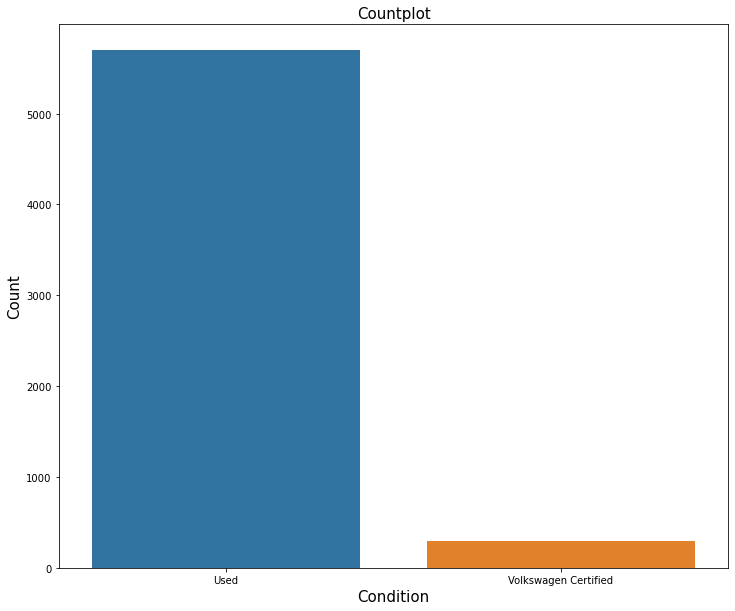

Used                    5700
Volkswagen Certified     300
Name: Condition, dtype: int64

In [54]:
plt.figure(figsize=(12,10))
sns.countplot('Condition',data = cars_data)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['Condition'].value_counts()

Most of the cars are of used condition.

# Dealer

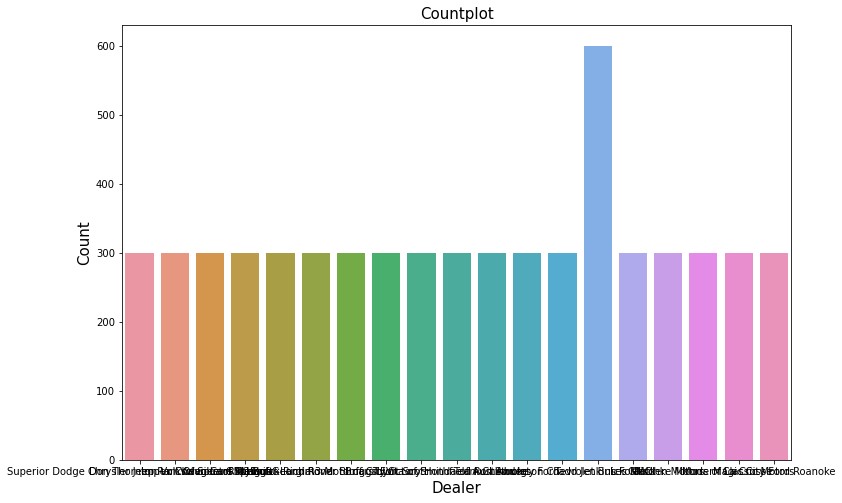

Tadd Jenkins Ford                                     600
Superior Dodge Chrysler Jeep Ram Of Siloam Springs    300
Team Chevrolet                                        300
Modern Classic Motors                                 300
Pischke Motors of La Crosse                           300
Golden Motors                                         300
Les Mack                                              300
Ron Anderson Chevrolet Buick GMC                      300
Stuckey Ford                                          300
Victory Honda of Austinburg                           300
Don Thornton Volkswagen of Tulsa                      300
Toyota of Smithfield                                  300
Briggs Fort Scott                                     300
R3 Motorcars LLC                                      300
Jaguar Land Rover Bluff City                          300
RideShift - Richmond                                  300
Volvo Cars Mall of Georgia                            300
Impex Chevrole

In [55]:
plt.figure(figsize=(12,8))
sns.countplot('Dealer',data = cars_data)
plt.xlabel('Dealer', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['Dealer'].value_counts()

There are total 19 dealers out  of which 18 are having equal numbers of vehicles i.e. 300 and only one dealer has 600 cars.

# make_year

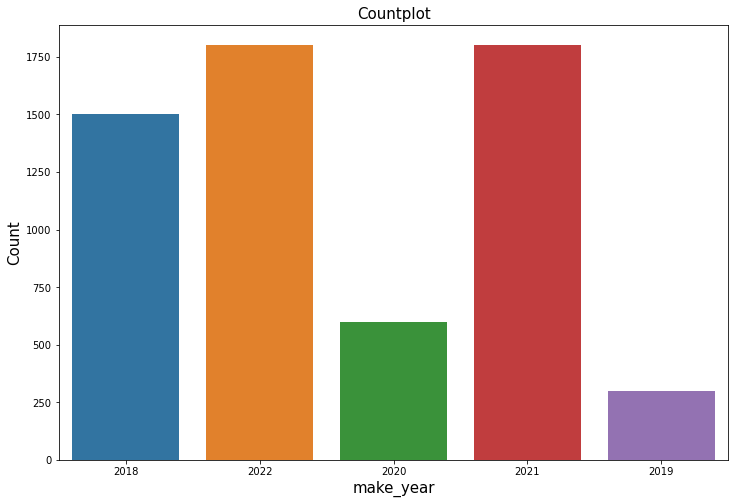

2022    1800
2021    1800
2018    1500
2020     600
2019     300
Name: make_year, dtype: int64

In [56]:
plt.figure(figsize=(12,8))
sns.countplot('make_year',data = cars_data)
plt.xlabel('make_year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['make_year'].value_counts()

Most of the cars are of make year 2021 followed by 2022.

# car_model

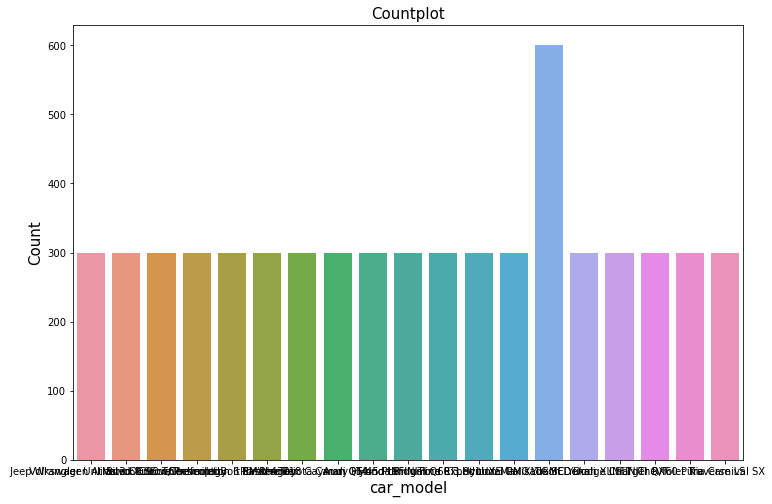

 GMC Yukon Denali                         600
 Jeep Wrangler Unlimited Rubicon          300
 INFINITI Q60 3.0t LUXE                   300
 Chevrolet Traverse LS                    300
 INFINITI QX60 Pure                       300
 Dodge Charger R/T                        300
 GMC Yukon XL SLT                         300
 Hyundai Palisade SEL                     300
 Ford Expedition Max XLT                  300
 Honda Ridgeline RTL                      300
 Volkswagen Atlas 3.6L SE w/Technology    300
 Audi Q5 45 Premium                       300
 Toyota Camry Hybrid LE                   300
 Porsche 718 Cayman GT4                   300
 BMW 430 i                                300
 Chevrolet Bolt EV Premier                300
 Volvo XC90 T6 Inscription 6 Passenger    300
 Buick Encore Preferred                   300
 Kia Carnival SX                          300
Name: car_model, dtype: int64

In [57]:
plt.figure(figsize=(12,8))
sns.countplot('car_model',data = cars_data)
plt.xlabel('car_model', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['car_model'].value_counts()

# Ratings

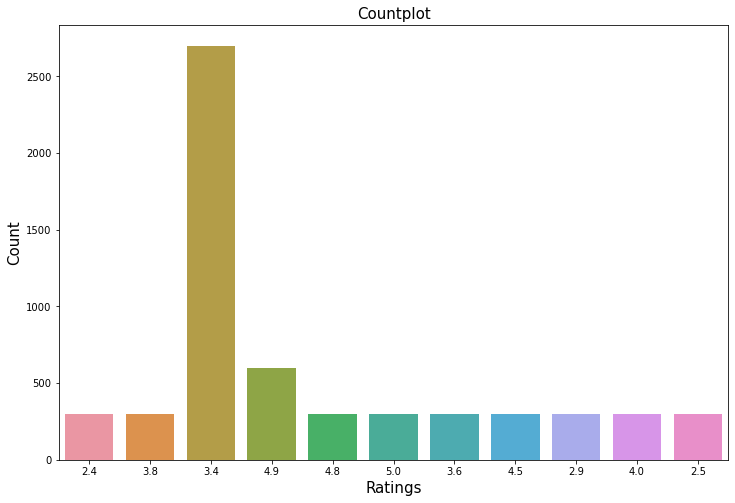

3.4    2700
4.9     600
2.4     300
3.8     300
4.8     300
5.0     300
3.6     300
4.5     300
2.9     300
4.0     300
2.5     300
Name: Ratings, dtype: int64

In [58]:
plt.figure(figsize=(12,8))
sns.countplot('Ratings',data = cars_data)
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['Ratings'].value_counts()

Maximum number of cars are with rating 4.8

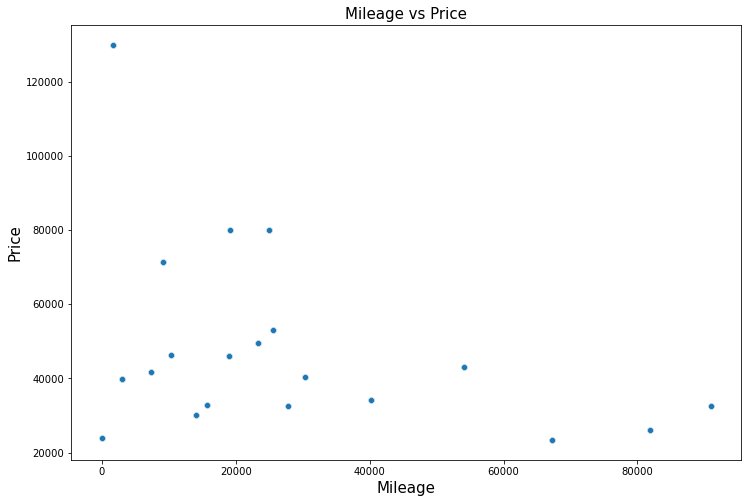

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Mileage',y='Price',data=cars_data)

plt.xlabel('Mileage', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Mileage vs Price',fontsize=15)
plt.show()

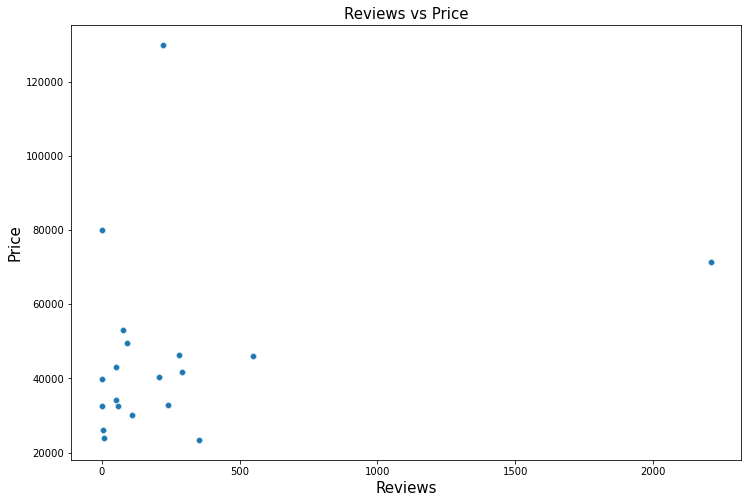

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Reviews',y='Price',data=cars_data)

plt.xlabel('Reviews', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Reviews vs Price',fontsize=15)
plt.show()

In [61]:
cars_data.describe()

,Mileage,Reviews,Price
count,6000.000000,6000.000000,6000.000000
mean,28284.800000,240.052632,47827.400000
std,25486.935276,474.478945,24945.337305
min,3.000000,0.000000,23373.000000
25%,10003.000000,5.500000,32498.500000
50%,21230.500000,83.000000,41098.000000
75%,32834.000000,250.289474,50443.250000
max,90922.000000,2209.000000,129989.000000


In [62]:
cars_data.describe(include=object)

,Condition,Dealer,Ratings,make_year,car_model
count,6000,6000,6000,6000,6000
unique,2,19,11,5,19
top,Used,Tadd Jenkins Ford,3.4,2022,GMC Yukon Denali
freq,5700,600,2700,1800,600


In [63]:
num = ['Mileage','Reviews','Price']

In [64]:
cat = ['Condition','Dealer','Ratings','make_year','car_model']

# Label Encoding

In [65]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    cars_data[i] = le.fit_transform(cars_data[i])
cars_data.head()

,Condition,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,0,13,54107.0,0,53.000000,42995.0,0,13
1,1,1,10301.0,5,281.000000,46355.0,4,17
2,0,3,3.0,3,6.000000,23950.0,4,2
3,0,18,9109.0,9,2209.000000,71482.0,4,18
4,0,10,15642.0,3,240.052632,32699.0,2,3


In [66]:
num = ['Mileage','Reviews','Price']

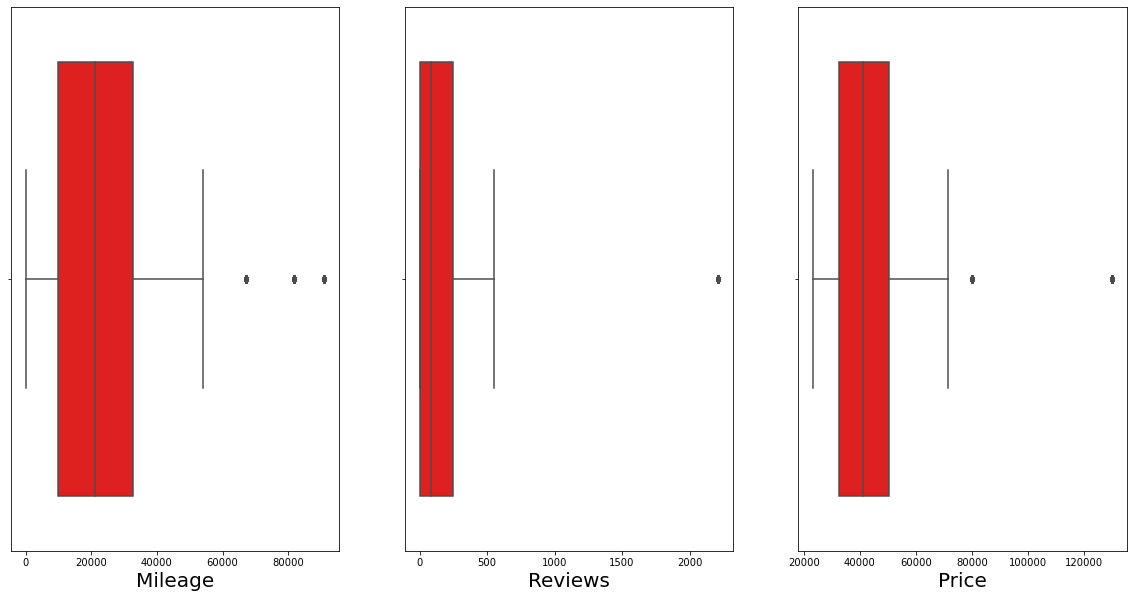

In [67]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(cars_data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers are present only in Reviews feature.

In [68]:
from scipy.stats import zscore
z = np.abs(zscore(cars_data))
threshold = 3
data = cars_data[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", cars_data.shape)
print ("Shape of the dataframe after removing outliers: ", data.shape)
print ("Percentage of data loss post outlier removal: ", (cars_data.shape[0]-data.shape[0])/cars_data.shape[0]*100)



Shape of the dataframe before removing outliers:  (6000, 8)
Shape of the dataframe after removing outliers:  (5100, 8)
Percentage of data loss post outlier removal:  15.0


Removing outliers using zscore method results into loss of 15% of data. Since the data is more realistic we can't afford this much data loss. 
So that we have to use another way to remove outliers which is Quantile based method.

From the above boxplot we can see that most of the features contains outliers and one more thing to note is that the outliers are present in upper bound. 
Here we will perform Quantile-based Flooring and Capping technique to remove outliers.
In this case, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.

In [72]:
Q1 = cars_data.quantile(0)
Q3= cars_data.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

Condition        0.05
Dealer          17.05
Mileage      82334.80
Ratings          9.05
Reviews        632.95
Price        59121.70
make_year        4.00
car_model       17.05
dtype: float64


In [73]:
df_new = cars_data[~((cars_data < (Q1 - 1.5 * IQR)) |(cars_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new.shape)
print ("Percentage of data loss post outlier removal: ", (cars_data.shape[0]-df_new.shape[0])/cars_data.shape[0]*100)


(5400, 8)
Percentage of data loss post outlier removal:  10.0


here we lost 10% of data which is better than the zscore method of outliers removal.

# Skewness

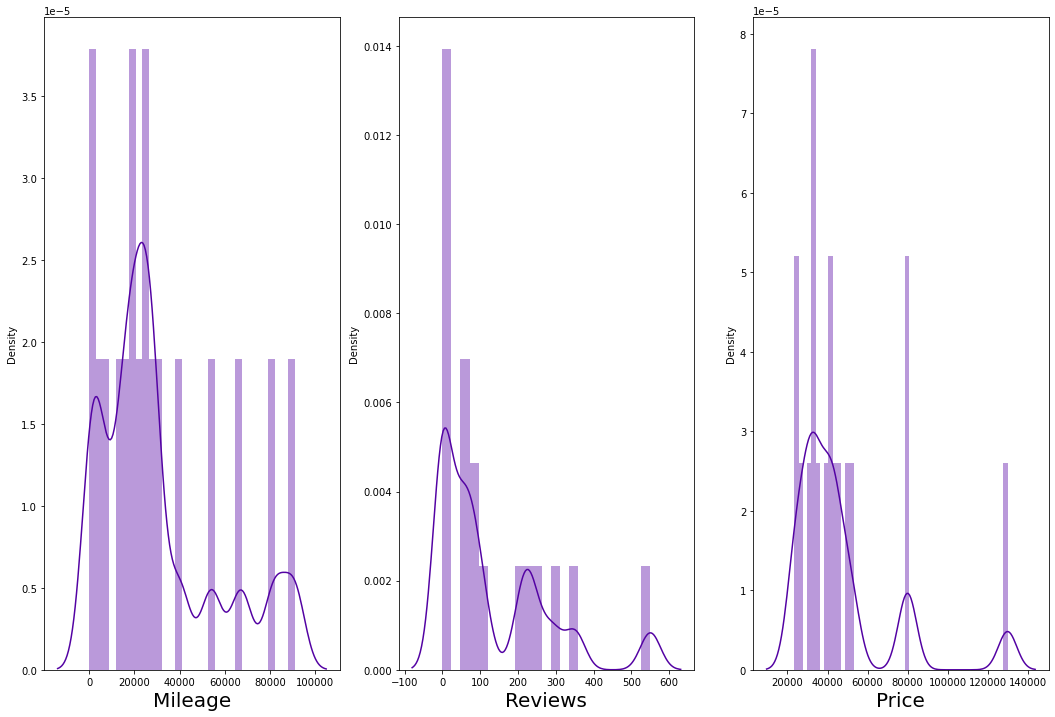

In [74]:
plt.figure(figsize=(18,12),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in num:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df_new[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [75]:
df_new[num].skew()

Mileage    1.031672
Reviews    1.336207
Price      1.993763
dtype: float64

In [76]:
skew=['Reviews','Mileage']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df_new[skew] = scaler.fit_transform(df_new[skew].values)

In [77]:
df_new[skew].skew()

Reviews   -0.220411
Mileage   -0.273702
dtype: float64

# Correlation

In [78]:
df_new.corr()['Price'].sort_values()

Mileage     -0.329052
Reviews     -0.021871
Dealer       0.237174
make_year    0.273684
car_model    0.319463
Ratings      0.401279
Price        1.000000
Condition         NaN
Name: Price, dtype: float64

Since, the feature 'Condition' is showing correlation 'NaN' which is because of there exist more identical values.
'NaN' means no correlation. So we will drop this feature.

In [79]:
df_new.drop(columns=['Condition'],axis=1,inplace=True)

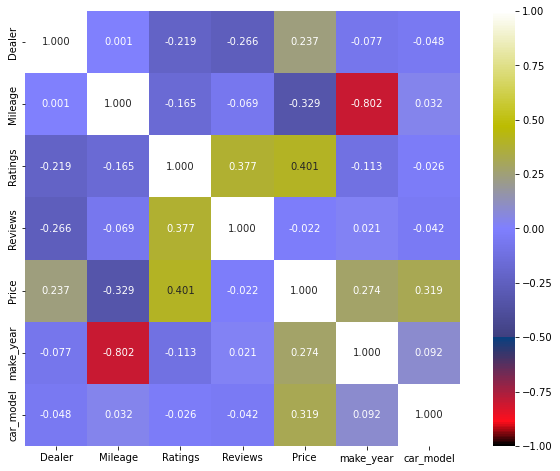

In [109]:
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

In [81]:
df_new.corr()

,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
Dealer,1.000000,0.000694,-0.218925,-0.265519,0.237174,-0.077207,-0.048483
Mileage,0.000694,1.000000,-0.165477,-0.069339,-0.329052,-0.801715,0.031891
Ratings,-0.218925,-0.165477,1.000000,0.376644,0.401279,-0.113083,-0.025762
Reviews,-0.265519,-0.069339,0.376644,1.000000,-0.021871,0.020725,-0.041647
Price,0.237174,-0.329052,0.401279,-0.021871,1.000000,0.273684,0.319463
make_year,-0.077207,-0.801715,-0.113083,0.020725,0.273684,1.000000,0.092288
car_model,-0.048483,0.031891,-0.025762,-0.041647,0.319463,0.092288,1.000000


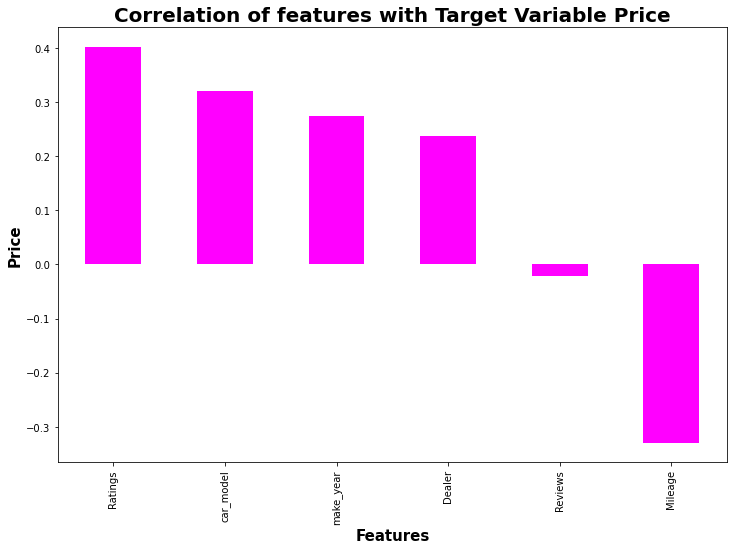

In [82]:
plt.figure(figsize = (12,8))
df_new.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price',fontsize = 20,fontweight='bold')
plt.show()

# Splitting Data into target and features

In [83]:
Y = df_new['Price']
X = df_new.drop(['Price'], axis =1)

# Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc= StandardScaler()
X_scale = sc.fit_transform(X)

# Multicollinearity

Here we will use the VIF method to check for multicollinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.159718,Dealer
1,3.771350,Mileage
2,1.545193,Ratings
3,1.225512,Reviews
4,3.786467,make_year
5,1.050478,car_model


All the Independent features VIF are within the permissible limit of 10 which means there is no multicollinearity present.

# Model Building

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (3618, 6)
Training target vector size: (3618,)
Test feature matrix size: (1782, 6)
Test target vector size: (1782,)


# Finding Best random state

In [90]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5574936301341684 on Random_state 36


# Linear Regression Model

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=36, test_size=.33)
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_lr))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_lr)))
print('R2_Score :' ,r2_score(Y_test,y_pred_lr))
print('CV_Score_lr : ',cross_val_score(lr, X_scale, Y, cv =5).mean())

Mean absolute error : 13581.128659656477
Mean squared error : 318408546.5524712
Root Mean Squared Error: 17844.00589981048
R2_Score : 0.5574936301341684
CV_Score_lr :  0.5193445661086012


# RandomForestRegressor

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=36, test_size=.33)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_rf))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_rf)))
print('R2_Score :' ,r2_score(Y_test,y_pred_rf))
print('CV_Score_rf : ',cross_val_score(rf, X_scale, Y, cv =5).mean())

Mean absolute error : 0.0
Mean squared error : 0.0
Root Mean Squared Error: 0.0
R2_Score : 1.0
CV_Score_rf :  1.0


# DecisionTreeRegressor

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=36, test_size=.33)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_dt))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_dt)))
print('R2_Score :' ,r2_score(Y_test,y_pred_dt))
print('CV_Score_dt : ',cross_val_score(dt, X_scale, Y, cv =5).mean())

Mean absolute error : 0.0
Mean squared error : 0.0
Root Mean Squared Error: 0.0
R2_Score : 1.0
CV_Score_dt :  1.0


# KNeighborsRegressor

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=36, test_size=.33)
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_knn))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_knn)))
print('R2_Score :' ,r2_score(Y_test,y_pred_knn))
print('CV_Score_dt : ',cross_val_score(knn, X_scale, Y, cv =5).mean())

Mean absolute error : 0.0
Mean squared error : 0.0
Root Mean Squared Error: 0.0
R2_Score : 1.0
CV_Score_dt :  1.0


# AdaBoostRegressor

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=36, test_size=.33)
ab=AdaBoostRegressor()
ab.fit(X_train,Y_train)
ab.score(X_train,Y_train)
y_pred_ab=ab.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_ab))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_ab))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_ab)))
print('R2_Score :' ,r2_score(Y_test,y_pred_ab))
print('CV_Score_ab : ',cross_val_score(ab, X_scale, Y, cv =5).mean())

Mean absolute error : 3620.4601175906096
Mean squared error : 25944161.54890307
Root Mean Squared Error: 5093.541160028361
R2_Score : 0.9639442569286503
CV_Score_ab :  0.9882319421224525


Among all the algorithms used Random Forest Regressor, DecisionTreeRegressor and KNeighborsRegressor gives us better R2 Score with zero Root Mean Squared Error.
Out of these 3 we will select Random Forest Regressor as final model and perform Hyperparameter optimization for this model

# Hyperparameter Optimization

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
n_estimators = [2,5,7,9,15]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [1,4]
min_samples_split = [1,5]
min_samples_leaf = [2,6]
bootstrap = ['true','false']

In [98]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [99]:
clf = GridSearchCV(rf,param_grid = param_grid,cv = 10,verbose = True,n_jobs = -1)

In [100]:
best_clf = clf.fit(X,Y)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


In [101]:
best_clf.best_estimator_

RandomForestRegressor(bootstrap='true', max_depth=4, max_features='auto',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=5)

In [104]:
param_score_rf = round(best_clf.score(X,Y),3)
param_score_rf

0.982

# Model Saving

In [105]:
import pickle

In [106]:
filename = "CarPricePrediction"
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [107]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,Y_test)
print(result*100)

100.0


# Prediction on Test Data

In [108]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_pred_rf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021